In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

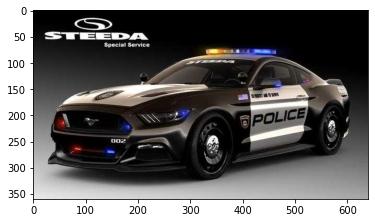

In [2]:
Data_dir = "C:/Users/ragha/Desktop/DePaul/Academics/Fall 23/Intro to image processing/Assignments/Project/train"

categories = ["Police", "Normal"]
 
for category in categories:
    path = os.path.join(Data_dir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.COLOR_BGR2RGB)
        plt.imshow(img_array, cmap = "gray")
        plt.show()
        break
    break
    

In [3]:
# Image processing function
def prepare(filepath):
    
    img_size = 224
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    
    edges = cv2.Canny(img_array, 50, 200)
    
    resized_img = cv2.resize(edges, (img_size, img_size))
    
    resized_img = np.array(resized_img).reshape(-1, img_size, img_size, 1)
    
    return resized_img


In [4]:
training_data = []

def create_train_data():
    for category in categories:
        path = os.path.join(Data_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_path = os.path.join(path, img)
                processed_image = prepare(img_path)
                training_data.append([processed_image, class_num])
            except Exception as e:
                pass

create_train_data()

In [5]:
import random

random.shuffle(training_data)

In [6]:
training_data[0]

[array([[[[ 0],
          [ 0],
          [ 0],
          ...,
          [ 0],
          [ 0],
          [ 0]],
 
         [[ 0],
          [ 0],
          [ 0],
          ...,
          [ 0],
          [ 0],
          [ 0]],
 
         [[91],
          [ 0],
          [ 0],
          ...,
          [ 0],
          [ 0],
          [ 0]],
 
         ...,
 
         [[ 0],
          [ 0],
          [ 0],
          ...,
          [ 0],
          [ 0],
          [ 0]],
 
         [[ 0],
          [ 0],
          [ 0],
          ...,
          [ 0],
          [ 0],
          [ 0]],
 
         [[ 0],
          [ 0],
          [ 0],
          ...,
          [ 0],
          [ 0],
          [ 0]]]], dtype=uint8),
 1]

In [7]:
X = []
y = []

In [8]:
img_size = 224
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 1)

In [9]:
y = np.array(y)
X_resized = []
for image in X:
    resized_image = cv2.resize(image, (224, 224))
    X_resized.append(resized_image)

X = np.array(X_resized)

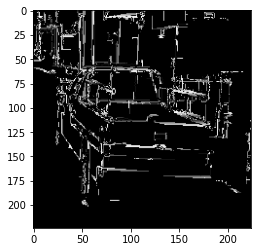

In [10]:
plt.imshow(X[1], cmap = "gray")

In [11]:
X[3].shape

(224, 224)

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [13]:
X1=[]
for i in X:
    i=i/255.0
    X1.append(i)
    
X1 = np.array(X1)

In [14]:
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(
            loss="binary_crossentropy",
            optimizer=Adam(learning_rate=0.0001),
            metrics=["accuracy"])


In [15]:
#model.fit(X, y, batch_size = 32, validation_split=0.1, epochs=10)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X1, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [17]:
import time

start_time = time.time()

print("Train set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

history = model.fit(X_train, y_train, batch_size=32, validation_data=(X_val, y_val), epochs=10)


test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")

end_time = time.time()

elapsed_time = end_time - start_time

print(f"Execution time: {elapsed_time} seconds")

Train set: (1519, 224, 224) (1519,)
Validation set: (190, 224, 224) (190,)
Test set: (190, 224, 224) (190,)
Epoch 1/10
48/48 [==============================] - 72s 1s/step - loss: 0.5361 - accuracy: 0.7465 - val_loss: 0.4424 - val_accuracy: 0.8316
Epoch 2/10
48/48 [==============================] - 68s 1s/step - loss: 0.3895 - accuracy: 0.8361 - val_loss: 0.3160 - val_accuracy: 0.8579
Epoch 3/10
48/48 [==============================] - 67s 1s/step - loss: 0.3047 - accuracy: 0.8782 - val_loss: 0.3302 - val_accuracy: 0.8421
Epoch 4/10
48/48 [==============================] - 69s 1s/step - loss: 0.2471 - accuracy: 0.8980 - val_loss: 0.2405 - val_accuracy: 0.9211
Epoch 5/10
48/48 [==============================] - 69s 1s/step - loss: 0.1954 - accuracy: 0.9276 - val_loss: 0.2059 - val_accuracy: 0.9316
Epoch 6/10
48/48 [==============================] - 67s 1s/step - loss: 0.1300 - accuracy: 0.9645 - val_loss: 0.1783 - val_accuracy: 0.9368
Epoch 7/10
48/48 [==============================] - 

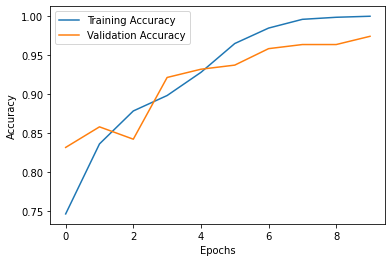

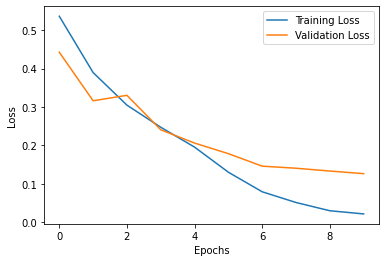

ValueError: in user code:

    File "C:\Users\ragha\Anaconda3\lib\site-packages\keras\src\engine\training.py", line 2042, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\ragha\Anaconda3\lib\site-packages\keras\src\engine\training.py", line 2025, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ragha\Anaconda3\lib\site-packages\keras\src\engine\training.py", line 2013, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\ragha\Anaconda3\lib\site-packages\keras\src\engine\training.py", line 1893, in test_step
        y_pred = self(x, training=False)
    File "C:\Users\ragha\Anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\ragha\Anaconda3\lib\site-packages\keras\src\engine\input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_1' (type Sequential).
    
    Input 0 of layer "conv2d_3" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (None, 224, 224)
    
    Call arguments received by layer 'sequential_1' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 224, 224), dtype=float32)
      • training=False
      • mask=None


In [19]:
# Plotting accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


In [ ]:
model.save('police_car_detection_edge.h5')

In [21]:
# Image processing function
def prepare(filepath):
    
    img_size = 224
    img_array = cv2.imread(filepath, cv2.COLOR_RGB2GRAY)
    
    # Edge Detection
    edges = cv2.Canny(img_array, 100, 200)
    
    
    # Resize the image
    resized_img = cv2.resize(edges, (img_size, img_size))
    
    # Add an extra dimension for the batch
    resized_img = np.array(resized_img).reshape(-1, img_size, img_size, 1)
    
    return resized_img


In [ ]:
model = tf.keras.models.load_model('police_car_detection_edge.h5')

In [23]:
if resized_image is not None:
    # Stack the single channel to create a three-channel image
    grayscale_image = np.stack((resized_image[0],)*3, axis=-1)

    # Make a prediction
    prediction = model.predict(np.array([grayscale_image]))
    print(categories[int(prediction[0][0])])


ValueError: in user code:

    File "C:\Users\ragha\Anaconda3\lib\site-packages\keras\src\engine\training.py", line 2416, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\ragha\Anaconda3\lib\site-packages\keras\src\engine\training.py", line 2401, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ragha\Anaconda3\lib\site-packages\keras\src\engine\training.py", line 2389, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\ragha\Anaconda3\lib\site-packages\keras\src\engine\training.py", line 2357, in predict_step
        return self(x, training=False)
    File "C:\Users\ragha\Anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\ragha\Anaconda3\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 224, 3)


In [22]:
prediction = model.predict([prepare("test.jpg")])
print(categories[int(prediction[0][0])])

ValueError: in user code:

    File "C:\Users\ragha\Anaconda3\lib\site-packages\keras\src\engine\training.py", line 2416, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\ragha\Anaconda3\lib\site-packages\keras\src\engine\training.py", line 2401, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ragha\Anaconda3\lib\site-packages\keras\src\engine\training.py", line 2389, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\ragha\Anaconda3\lib\site-packages\keras\src\engine\training.py", line 2357, in predict_step
        return self(x, training=False)
    File "C:\Users\ragha\Anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\ragha\Anaconda3\lib\site-packages\keras\src\engine\input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_1' (type Sequential).
    
    Input 0 of layer "conv2d_3" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (None, 224, 224, 1)
    
    Call arguments received by layer 'sequential_1' (type Sequential):
      • inputs=('tf.Tensor(shape=(None, 224, 224, 1), dtype=uint8)',)
      • training=False
      • mask=None


In [ ]:
prediction = model.predict([prepare("test1.jpg")])
print(categories[int(prediction[0][0])])